<center>
    <big><b>Exploratory Data Analysis</b></big>
</center>

This notebook aims to **explore** and **clean** the zomato files in order to generate insights about the restaurants, ratings, people and so on.

<center><b>Insights</b></center>

**Insight 1:**

The 5 most famous restaurants in Bengaluru are:
1. **Onesta**
2. **Empire Restaurant**
3. **KFC**
4. **McDonald's**
5. **Pizza Hut**

**Insight 2:**

Here it is able to see that most restaurants do not offer table booking for their customers.

**Insight 3:**

Most restaurants offer on-line order and delivery.

**Insight 4:**

Most of the ratings are within 3.5 and 4.5.

**Insight 5:**

There are only 5 restaurants with ratings between 1 and 2 stars and most of the ratings are indeed between 3 and 5.

**Insight 6:**

Main servicies:
1. **Delivery** 
2. **Dine-out**

**Insight 7:**

Most of the prices for on-line orders vary from 400 to 1000.

**Innsight 8:**

The most liked dishes and drinks are pasta, pizza, cocktails, burgers and mocktails.

**Insight 9:**

Most common types of restaurants in Bangaluru:
1. **Casual dining** 
2. **Quick bites** 
3. **Cafe**

**Insight 10:**:

Top neighbors:
1. **BTM**
2. **Koramangala**
3. **Jayanagar**
4. **Indiranagar**

# Imports

In [68]:
# data wrangling
import pandas as pd
import numpy as np
import re

# data visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
import seaborn as sns
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

# Get Data

In [69]:
data = pd.read_csv('zomato.csv')

# Exploratory Data Analysis

In [70]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Columns description

1. **url </B>** contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines food styles** separated by comma

13. **approx_cost(for two people)** contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in(type)** type of meal

17. **listed_in(city)** contains the neighborhood in which the restaurant is listed

In [71]:
data.shape

(51717, 17)

In [72]:
data.dtypes # checking data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

The data type os some columns supposed to be numerical are marked as strings. It's going to be necessary to fix it later.

In [73]:
data.isnull().sum() # checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [74]:
# deleting unnecessary columns
df = data.drop(columns = ['url', 'phone'], axis = 1)

## Checking for duplicate values

In [75]:
# checking duplicates
df.duplicated().sum()

43

In [76]:
df.drop_duplicates(inplace = True)

In [77]:
df.duplicated().sum()

0

## Drop null values

Those values can be dropped due to inconsistences during the data extraction.

In [78]:
df.dropna(how = 'any', inplace = True)

In [79]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [80]:
data.shape[0] - df.shape[0]

28322

We've dropped 28322 columns will null values.

## Renaming columns

In [81]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [82]:
df = df.rename(columns = {'approx_cost(for two people)':'cost',
                          'listed_in(type)':'type',
                          'listed_in(city)':'city'},
                          )

In [83]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [84]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Cleaning dataset

There are some inconsistences and improvements it's possible to do in this dataset for a better analysis.

### Cost

In [85]:
# unique values from cost column
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

The cost values are strings and they have commas between them.

In [86]:
# removing commas from the cost column
df['cost'] = df['cost'].apply(lambda x: x.replace(',', ''))

In [87]:
# changing the dtype of cost column
df['cost'] = df['cost'].astype('int64')

In [88]:
df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  750,  200,
        850, 1200,  150,  350,  250, 1500, 1300, 1000,  100,  900, 1100,
       1600,  950,  230, 1700, 1400, 1350, 2200, 2000, 1800, 1900,  180,
        330, 2500, 2100, 3000, 2800, 3400,   40, 1250, 3500, 4000, 2400,
       1450, 3200, 6000, 1050, 4100, 2300,  120, 2600, 5000, 3700, 1650,
       2700, 4500], dtype=int64)

In [89]:
# analyzing the result
print(df['cost'].unique())

print('---' * 10)

df.dtypes

[ 800  300  600  700  550  500  450  650  400  750  200  850 1200  150
  350  250 1500 1300 1000  100  900 1100 1600  950  230 1700 1400 1350
 2200 2000 1800 1900  180  330 2500 2100 3000 2800 3400   40 1250 3500
 4000 2400 1450 3200 6000 1050 4100 2300  120 2600 5000 3700 1650 2700
 4500]
------------------------------


address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
cost             int64
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

### Rate

In [90]:
# unique vales from rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

It'll be necessary to remove the 'NEW' cost and remove the bars.

In [91]:
df[df['rate'] == 'NEW']

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
1011,"15, Bannerghatta Main Road, JP Nagar, Bangalore",Le Arabia,Yes,No,NEW,0,JP Nagar,Casual Dining,Chicken Biryani,"North Indian, Mughlai",600,"[('Rated 4.0', ""RATED\n Very good Arabian sty...","['Le Arabia Special Ice cream', 'Perfite Ice c...",Delivery,Bannerghatta Road
2239,"24th Main, 7th Phase, Opposite Brigade Palm Sp...",Brahma Brews,No,Yes,NEW,0,JP Nagar,"Microbrewery, Casual Dining","Beer, Cocktails, Pizza, Peri Chicken, Belgian ...","Continental, South Indian, Finger Food, Pizza,...",1400,"[('Rated 4.0', 'RATED\n This huge property lo...",[],Dine-out,Bannerghatta Road
2240,"57, 1st Main Rd, Sarakki Industrial Layout, 3r...",Levitate Brewery and Kitchen,No,Yes,NEW,0,JP Nagar,"Microbrewery, Casual Dining","Wheat Beer, Lager, Paneer Lollipop, Rustica Pi...","Finger Food, North Indian, Continental",1500,"[('Rated 4.0', 'RATED\n A new brewery has com...",[],Dine-out,Bannerghatta Road
2250,"15, Bannerghatta Main Road, JP Nagar, Bangalore",Le Arabia,Yes,No,NEW,0,JP Nagar,Casual Dining,Chicken Biryani,"North Indian, Mughlai",600,"[('Rated 4.0', ""RATED\n Very good Arabian sty...",[],Dine-out,Bannerghatta Road
2258,"67, Ground Floor, 3rd E Main Road, 15th Cross ...",Nourich,No,Yes,NEW,0,JP Nagar,Casual Dining,"Soba Noodles, Pad Thai Noodle, Chicken Sandwich","Continental, Chinese, North Indian, Asian, Hea...",800,"[('Rated 5.0', 'RATED\n The ambience is reall...",[],Dine-out,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50032,"74/2, Bellandur Junction, Outer Ring Road, Opp...",Parrattha Ssinghh,Yes,No,NEW,0,Bellandur,Quick Bites,Paratha,North Indian,250,"[('Rated 5.0', 'RATED\n Aloo paratha and pane...","['Aloo Paneer Paratha', 'Paneer Bhurji Paratha...",Dine-out,Sarjapur Road
50050,"74/2, Opposite Apollo Pharmacy, Outer Ring Roa...",Deli Chats & Sweets,Yes,No,NEW,0,Bellandur,Quick Bites,"Chaat, Tea, Sev Puri, Chai, Raj Kachori, Coffe...","Street Food, Mithai",200,"[('Rated 5.0', 'RATED\n Deli chaats and sweet...","['Pav Bhaji', 'Kadhi with Rice', 'Dal with Ric...",Dine-out,Sarjapur Road
50135,"Arya Hub Mall, 12/2, 13/1B, ITBP Main Road, Pr...",Potful,Yes,No,NEW,0,Whitefield,Delivery,"Hyderabadi Biryani, Rumali Roti, Raita","Biryani, Kebab, Rolls, Mughlai",650,"[('Rated 2.0', 'RATED\n I had ordered a coupl...","['Calcutta Chicken Roll', 'Galouti Kebab With ...",Delivery,Whitefield
50571,"176, Thubarahalli, Near Kundalahalli Gate, Whi...",Temptation,Yes,No,NEW,0,Whitefield,Quick Bites,Mutton Curry,North Indian,500,"[('Rated 5.0', 'RATED\n Just to say Ã\x83Ã\...",[],Delivery,Whitefield


In [92]:
# selecting the rates
df = df.loc[df['rate'] != 'NEW']

In [93]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [94]:
# removing '/5' from rate column
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', ''))

In [95]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [96]:
df['rate'] = df['rate'].astype('float64')

## Neighborhood

The column city describes the neighborhood where the restaurants are located.

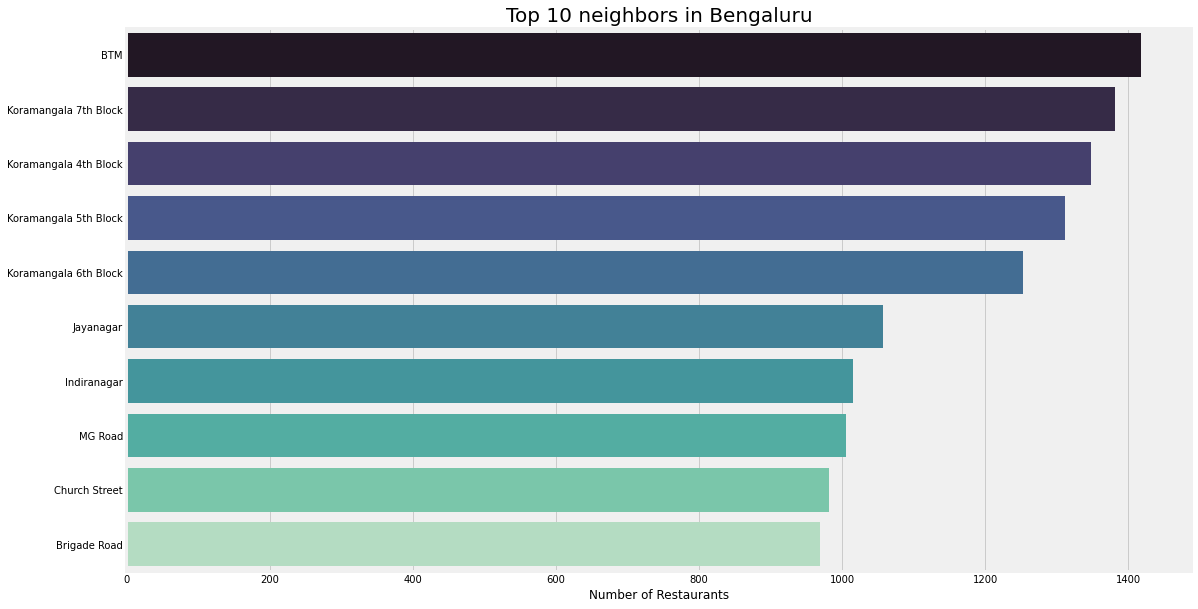

In [129]:
plt.figure(figsize = (17, 10))
chains = df['city'].value_counts()[:10]
sns.barplot(x = chains, y = chains.index, palette = 'mako')
plt.title('Top 10 neighbors in Bengaluru', fontsize = 20)
plt.xlabel('Number of Restaurants')
plt.show()

## Visualizations

### Most famous restaurant chains in Bangaluru

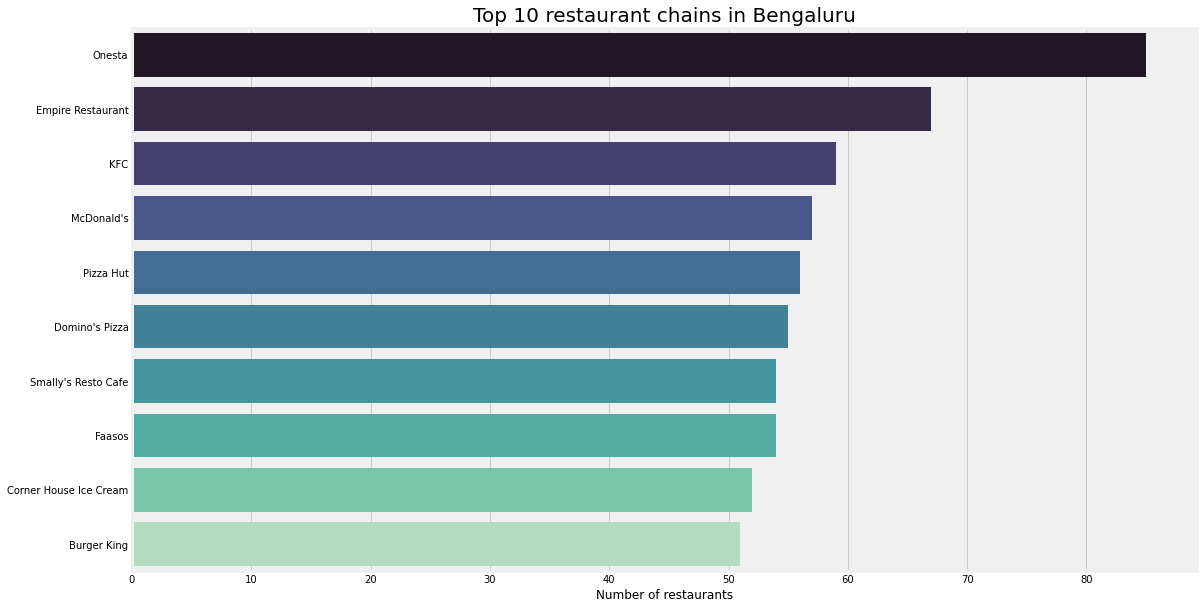

In [97]:
plt.figure(figsize = (17, 10))
chains = df['name'].value_counts()[:10]
sns.barplot(x = chains, y = chains.index, palette = 'mako')
plt.title('Top 10 restaurant chains in Bengaluru', fontsize = 20)
plt.xlabel('Number of restaurants')
plt.show()

**Insight:**

The 5 most famous restaurants in Bengaluru are:
1. Onesta
2. Empire Restaurant
3. KFC
4. McDonald's
5. Pizza Hut

### Whether restaurant offers table booking or not

In [98]:
x = df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace = go.Pie(labels = x.index, values = x, textinfo = 'value',
            marker = dict(colors = colors, 
                           line = dict(color = '#001000', width = 2)))
layout = go.Layout(title = 'Table booking rating', width = 600, height = 600)
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig, filename = 'pie_chart_subplots')

**Insight:**

Here it is able to see that most restaurants do not offer table booking for their customers.

### Whether restaurants deliver on-line or not

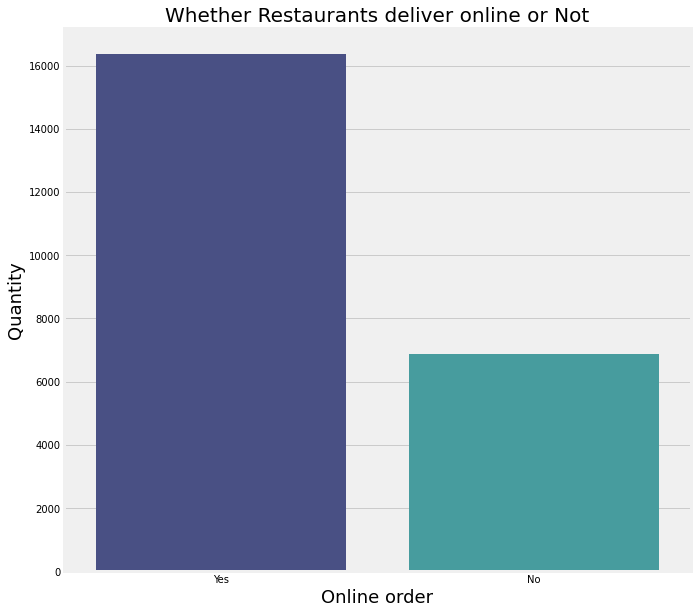

In [99]:
# Restaurants delivering online or not
sns.countplot(df['online_order'], palette = 'mako')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not', fontsize = 20)
plt.xlabel('Online order', fontsize = 18)
plt.ylabel('Quantity', fontsize = 18)
plt.show()

**Insight:**

Most restaurants offer on-line order and delivery.

### Rating distribuitions

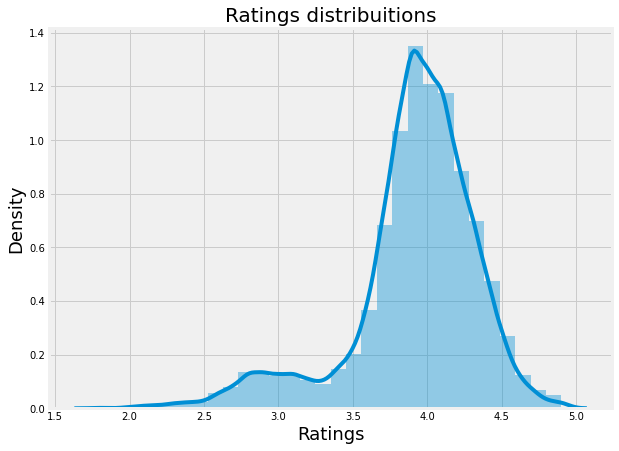

In [100]:
# how ratings are distributed
plt.figure(figsize = (9, 7))
ax = sns.distplot(df['rate'], bins = 30)
plt.title('Ratings distribuitions', fontsize = 20)
plt.xlabel('Ratings', fontsize = 18)
plt.ylabel('Density', fontsize = 18)
ax = ax

**Insight:**

Most of the ratings are within 3.5 and 4.5

### Count of ratings between integer values

In [101]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [102]:
df['rate'].min()

1.8

In [103]:
df['rate'].max()

4.9

In [104]:
((df['rate'] >= 1) & (df['rate'] < 2)).sum()

5

In [105]:
((df['rate'] >= 2) & (df['rate'] < 3)).sum()

1179

In [106]:
((df['rate'] >= 3) & (df['rate'] < 4)).sum()

10153

In [107]:
(df['rate'] >= 4).sum()

11911

**Insight:**

There are only 5 restaurants with ratings between 1 and 2 stars and most of the ratings are indeed between 3 and 5.

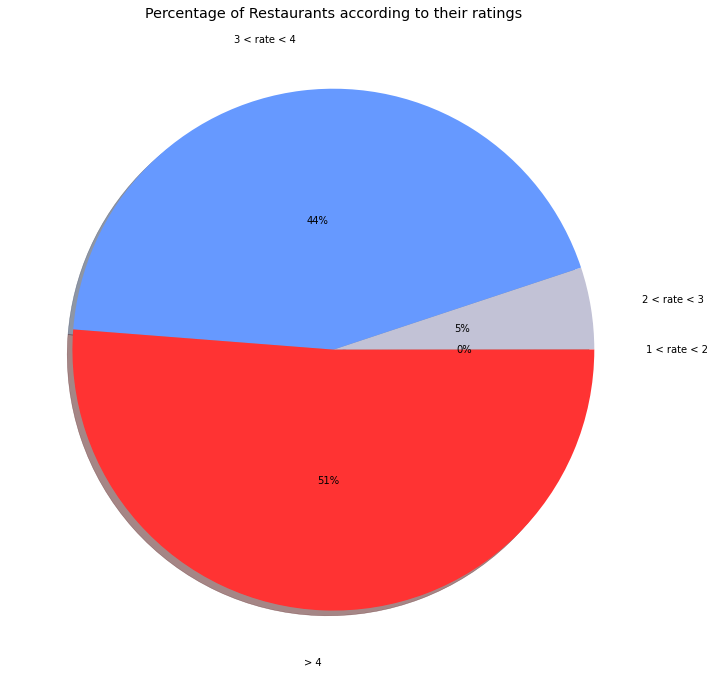

In [108]:
slices = [((df['rate'] >= 1) & (df['rate'] < 2)).sum(),
        ((df['rate'] >= 2) & (df['rate'] < 3)).sum(),
        ((df['rate'] >= 3) & (df['rate'] < 4)).sum(),
        (df['rate'] >= 4).sum()
        ]

labels=['1 < rate < 2','2 < rate < 3','3 < rate < 4','> 4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices, colors = colors, labels = labels, autopct = '%1.0f%%',
        pctdistance = .5, labeldistance = 1.2, shadow = True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(12,12)
plt.show()

### Service Types

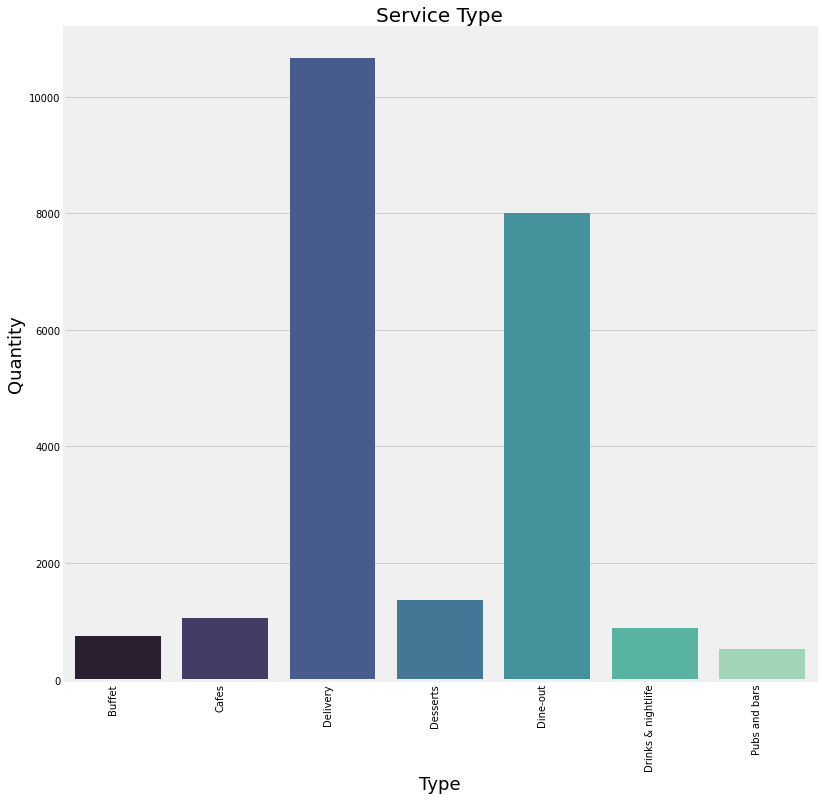

In [109]:
#Types of Services

ax = sns.countplot(df['type'], palette = 'mako').set_xticklabels(sns.countplot(df['type'], palette = 'mako').get_xticklabels(),
rotation = 90, ha = 'right')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Service Type', fontsize = 20)
plt.xlabel('Type', fontsize = 18)
plt.ylabel('Quantity', fontsize = 18)
ax = ax

**Insight:**

The two main servicies are delivery and dine-out.

#### Distribuition of food cost for two people

In [110]:
trace0 = go.Box(y = df['cost'], name = 'accepting online orders',
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data = [trace0]
layout = go.Layout(title = 'Box plot of approximate cost',
                   width = 800, height = 800, yaxis = dict(title = 'Price'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

**Insight:**

Most of the prices for on-line orders vary from 400 to 1000.

#### Distribuition of charges

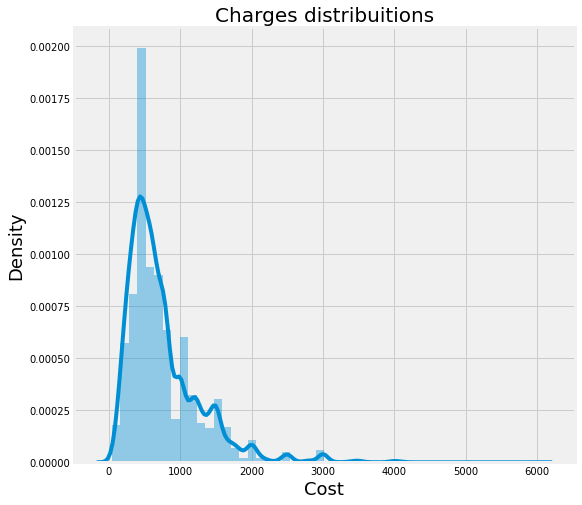

In [111]:
plt.figure(figsize = (8, 8))
ax = sns.distplot(df['cost'])
plt.title('Charges distribuitions', fontsize = 20)
plt.xlabel('Cost', fontsize = 18)
plt.ylabel('Density', fontsize = 18)
ax = ax

## Most liked dishes

In [112]:
df.index = range(df.shape[0])
likes = []
for i in range(df.shape[0]):
    array_split = re.split(',' , df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [113]:
df.index = range(df.shape[0])

In [114]:
print("Count of Most liked dishes in Bangalore")

favourite_food = pd.Series(likes).value_counts()
favourite_food.head(10)

Count of Most liked dishes in Bangalore


 Pasta         2692
 Pizza         1915
 Cocktails     1880
 Burgers       1736
 Mocktails     1623
 Biryani       1307
 Sandwiches    1287
Burgers        1256
 Coffee        1184
 Nachos        1170
dtype: int64

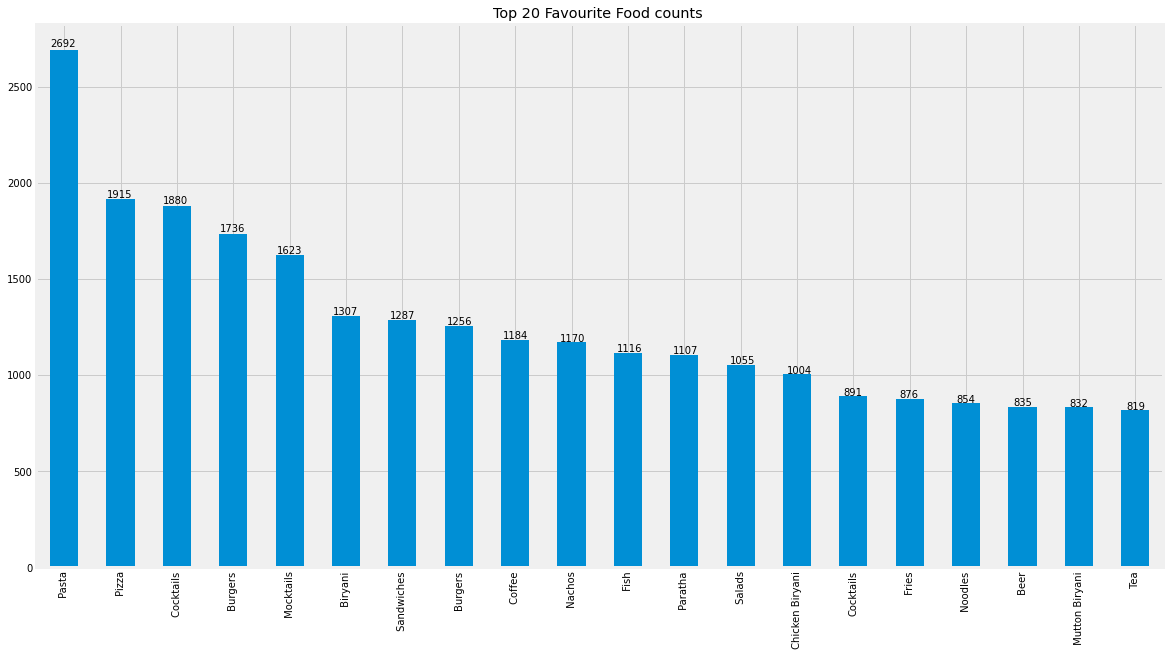

In [115]:
ax = favourite_food.nlargest( n = 20, keep = 'first').plot(kind = 'bar', figsize = (18, 10), title = 'Top 20 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

**Innsight:**

The 5 most liked dishes and drinks are pasta, pizza, cocktails, burgers and mocktails.

## Restaurant and their counts

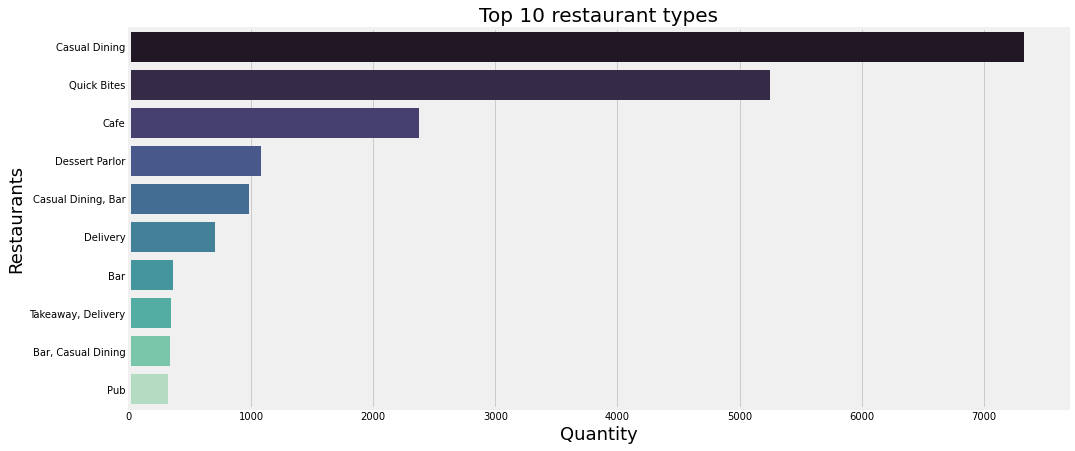

In [116]:
plt.figure(figsize = (15,7))
rest = df['rest_type'].value_counts()[:10]
ax = sns.barplot(rest, rest.index, palette = 'mako')
plt.title('Top 10 restaurant types', fontsize = 20)
plt.xlabel('Quantity', fontsize = 18)
plt.ylabel('Restaurants', fontsize = 18)
ax = ax

**Insight:**

The 3 most common types of restaurants in Bangaluru are **casual dining**, **quick bites** and **cafe**.

In [117]:
df.to_parquet('zomato_cleaned.parquet')